############################################################################################
#################### -- Estadística para Ciencia de Datos --################################
############################################################################################

Modelos de Regresión Avanzados : Regresión Múltiple, Regresiones Penalizadas

Autores : José Cárdenas - André Chávez 

In [ ]:
##################################################
##### Modelo de Regresión Lineal Simple ##########
##################################################

In [1]:
import pandas as pd # Dataframes
# Cargamos las librerías a utilizar
% matplotlib inline
import numpy as np # Arreglos y matrices
import scipy.stats as stats 
import matplotlib.pyplot as plt # Graficos
vivienda=pd.read_excel('C:/Users/Andre Chavez/Desktop/Datos/PrecioVivienda.xlsx')

In [2]:
vivienda.shape

(128, 2)

In [7]:
# Antes de poder realizar el modelo de regresión lineal debemos ver si existe asociación y de qué tipo es.
# coeficiente de correlación
vivienda.corr()

,Precio,Piescuad
Precio,1.000000,0.552982
Piescuad,0.552982,1.000000


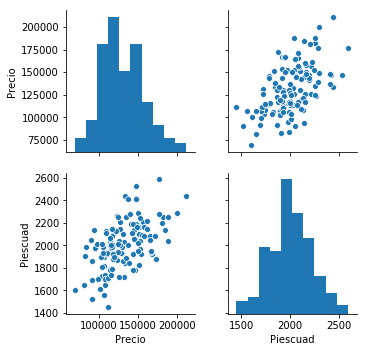

In [3]:
import seaborn as sns 
par= sns.pairplot(vivienda)

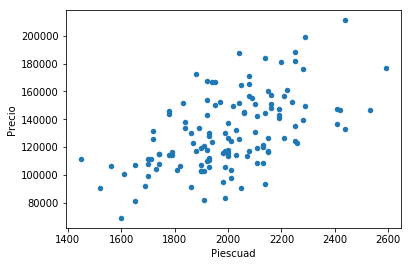

In [4]:
# diagrama de dispersión
disp= vivienda.plot(kind='scatter', x='Piescuad', y='Precio')

In [ ]:
# Separamos la VD y la VI

In [5]:
# Al dataset o set de entrenamiento le retiramos la variable dependiente o target
X=vivienda.drop('Precio',axis=1)
y=vivienda.Piescuad

In [6]:
# Cargamos el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [7]:
# Entrenamiento
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
# Hallamos el intercepto u ordenada en el origen
print("El coeficiente asociado a la ordenada en el origen es :")
lm.intercept_

El coeficiente asociado a la ordenada en el origen es :


-9.094947017729282e-13

In [9]:
# Hallamos el intercepto u ordenada en el origen
print("El coeficiente asociado a la pendiente en el origen es :")
lm.coef_

El coeficiente asociado a la pendiente en el origen es :


array([1.])

Text(0.5,1,'Gráfico de Dispersión entre Precios vs Precio Estimados')

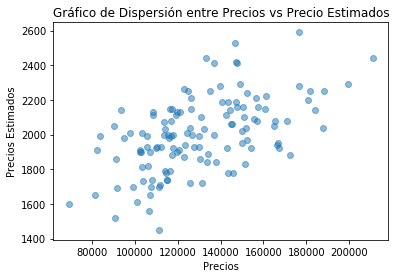

In [10]:
plt.scatter(vivienda.Precio,lm.predict(X), alpha=0.5)
plt.xlabel("Precios")
plt.ylabel("Precios Estimados")
plt.title("Gráfico de Dispersión entre Precios vs Precio Estimados")

In [11]:
# Veamos el MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y, lm.predict(X))

1.0905213153775267e-26

In [12]:
# Prediciendo
lm.predict(X)[0:5]

array([1790., 2030., 1740., 1980., 2130.])

In [ ]:
##################################################
##### Modelo de Regresión Lineal Múltiple ########
##################################################

In [13]:
# Cargamos las librerías a utilizar
% matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import sklearn

In [14]:
from sklearn.datasets import load_boston # Existen datasets que podemos utilizar en el desarrollo de los temas. UCI

In [15]:
# Cargamos la data con la información
boston=load_boston()

In [16]:
# Observamos los elementos que extraemos en la data
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [17]:
boston.data.shape

(506, 13)

In [18]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [19]:
# Descripción del dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [20]:
# Podemos obervar los datos que provienen en la información
bos = pd.DataFrame(boston.data)

In [21]:
bos.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [22]:
# Renombrar las columnas de dataset
bos.columns = boston.feature_names

In [23]:
bos.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [24]:
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [25]:
# Le asignamos el nombre a la variable target o más importante, y lo agregamos al dataframe creado 
# en la parte superior
bos["PRICE"]=boston.target

In [26]:
bos.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4


In [27]:
# Al dataset o set de entrenamiento le retiramos la variable dependiente o target
X=bos.drop("PRICE",axis=1)

In [28]:
# Cargamos el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [29]:
# Entrenamiento del modelo de regresión
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
# Hallamos el intercepto u ordenada en el origen
print("El coeficiente asociado a la ordenada en el origen es :")
lm.intercept_

El coeficiente asociado a la ordenada en el origen es :


36.45948838509015

In [31]:
# Hallamos el coeficiente
print("El núnero de coeficientes es :")
len(lm.coef_)

El núnero de coeficientes es :


13

In [32]:
# Podemos observar todos los coeficientes asignados con sus nombres
coef=pd.DataFrame(lm.coef_,X.columns)
coef

,0
CRIM,-0.108011
ZN,0.046420
INDUS,0.020559
CHAS,2.686734
NOX,-17.766611
RM,3.809865
AGE,0.000692
DIS,-1.475567
RAD,0.306049
TAX,-0.012335


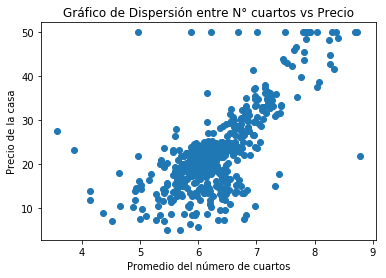

In [33]:
plt.scatter(bos.RM,bos.PRICE)
plt.xlabel("Promedio del número de cuartos")
plt.ylabel("Precio de la casa")
plt.title("Gráfico de Dispersión entre N° cuartos vs Precio")
plt.show()

In [34]:
# Con predict podemos predecir cualquier valor deseado.
lm.predict(X)[0:12]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568])

Text(0.5,1,'Gráfico de Dispersión entre Precios vs Precio Estimados')

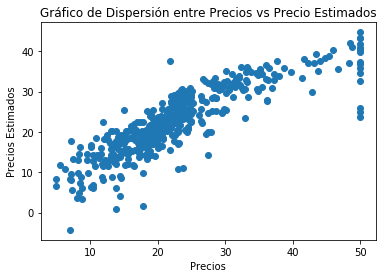

In [35]:
plt.scatter(bos.PRICE,lm.predict(X))
plt.xlabel("Precios")
plt.ylabel("Precios Estimados")
plt.title("Gráfico de Dispersión entre Precios vs Precio Estimados")

In [36]:
# Calculamos el error cuadrático medio u algún indicador para validar que tan bien fue nuestra predicción.
mse_Total = np.mean((bos.PRICE-lm.predict(X))**2)
mse_Total

21.89483118172922

In [37]:
# Podemos correr otro modelo de regresión y comparar los resultados
lm=LinearRegression()
lm.fit(X[['PTRATIO']],bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
mse_Parcial=np.mean((bos.PRICE-lm.predict(X[['PTRATIO']]))**2)
mse_Parcial

62.65220001376927

######--- Metodología de Modelamiento ---#######

In [39]:
# Dividimos el conjunto de datos en train, test, validacion 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,bos.PRICE,test_size=0.30,random_state=5)

In [40]:
# Podemos revisar la cantidad de elementos por dataset
X_test.shape


(152, 13)

In [41]:
# Ajustamos el modelo de regresión lineal
lm=LinearRegression()
lm.fit(X_train , Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
pred_train=lm.predict(X_train) # Esto está mal
pred_test=lm.predict(X_test)   # Esto está bien

In [43]:
print("Ajustamos un modelo y lo evaluamos en entrenamiento:",
      np.mean((Y_train - lm.predict(X_train)) ** 2))
print("Ajustamos un modelo y lo evaluamos en test:", 
      np.mean((Y_test - lm.predict(X_test)) ** 2))

Ajustamos un modelo y lo evaluamos en entrenamiento: 19.06834185092723
Ajustamos un modelo y lo evaluamos en test: 30.697037704088608


In [ ]:
##################################################
##### Modelo de Regresión Penalizadas ############
##################################################

In [ ]:
##### Modelo de Regresión Penalizadas : Ridge ############

In [44]:
# Cargamos las librerías necesarias
%matplotlib inline
import pandas as pd # Trabajar con dataframes
import numpy as np # Trbaja con vectores y matrices
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale  
from sklearn.model_selection import train_test_split # Partición muestral
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [45]:
# Creamos un vector con los valores de alpha o constante de penalización
alphas = 10**np.linspace(10,-1,100)*0.5
alphas.shape

(100,)

In [46]:
# Generamos las covariables y la VD.
X=bos.drop("PRICE",axis=1)
y=bos.PRICE

In [47]:
# Generamos el ajuste de las regresiones para cada valor de alpha
ridge = Ridge(normalize = True)
coefs = []
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 13)

Text(0,0.5,'weights')

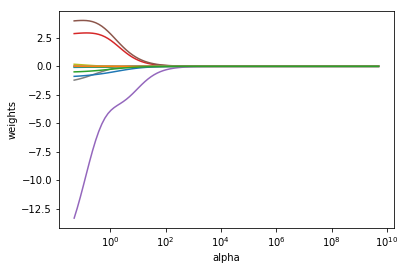

In [48]:
# Graficamos los valores de alpha
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [49]:
# Dividimos o partimos la data en train y test
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [50]:
# Le asignamos un valor pequeño a alpha y observamos que pasa con el error en el test
ridge2 = Ridge(alpha = 0.001, normalize = True)
ridge2.fit(X_train, y_train)             # Ajustamos el modelo ridge
pred2 = ridge2.predict(X_test)           # Usamos el modelo para predecir
print(pd.Series(ridge2.coef_, index = X.columns)) # Pintamos los coeficientes
print(mean_squared_error(y_test, pred2))          # Calculamos el MSE

CRIM       -0.097919
ZN          0.060230
INDUS       0.057062
CHAS        2.447693
NOX       -21.325578
RM          2.804626
AGE         0.003408
DIS        -1.507621
RAD         0.302691
TAX        -0.011039
PTRATIO    -1.003792
B           0.006458
LSTAT      -0.567639
dtype: float64
19.82268607001009


In [51]:
# Le asignamos un valor grande a alpha y observamos que pasa con el error en el test
ridge3 = Ridge(alpha = 10**10, normalize = True)
ridge3.fit(X_train, y_train)             # Ajuste del modelo ridge
pred3 = ridge3.predict(X_test)           # Usamos el modelo para predecir
print(pd.Series(ridge3.coef_, index = X.columns)) 
print(mean_squared_error(y_test, pred3))     

CRIM      -4.285670e-11
ZN         1.476261e-11
INDUS     -6.250350e-11
CHAS       5.947531e-10
NOX       -3.460799e-09
RM         8.461092e-10
AGE       -1.360935e-11
DIS        1.246380e-10
RAD       -3.808311e-11
TAX       -2.321693e-12
PTRATIO   -2.134748e-10
B          3.230252e-12
LSTAT     -9.166916e-11
dtype: float64
92.06717295357069


In [52]:
# ¿Qué pasa si alpha o el coeficiente de penalización es 0?
ridge2 = Ridge(alpha = 0, normalize = True)
ridge2.fit(X_train, y_train)    
pred = ridge2.predict(X_test)            
print(pd.Series(ridge2.coef_, index = X.columns)) 
print(mean_squared_error(y_test, pred))           

CRIM       -0.098542
ZN          0.060784
INDUS       0.059172
CHAS        2.439560
NOX       -21.469965
RM          2.795814
AGE         0.003575
DIS        -1.516272
RAD         0.307542
TAX        -0.011280
PTRATIO    -1.005466
B           0.006450
LSTAT      -0.568835
dtype: float64
19.83132367206314


In [53]:
# Podemos hallar el mejor valor de alpha por Cv
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.05

In [54]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
mean_squared_error(y_test, ridge4.predict(X_test))

20.072704787522127

In [55]:
ridge4.fit(X, y)
pd.Series(ridge4.coef_, index = X.columns)

CRIM       -0.091966
ZN          0.035546
INDUS      -0.027825
CHAS        2.869217
NOX       -13.311142
RM          3.985795
AGE        -0.002908
DIS        -1.211961
RAD         0.183001
TAX        -0.006841
PTRATIO    -0.879989
B           0.009165
LSTAT      -0.486547
dtype: float64

In [ ]:
##### Modelo de Regresión Penalizadas : Lasso ############

Text(0,0.5,'weights')

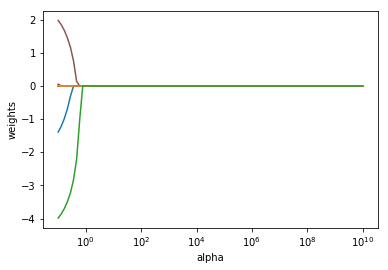

In [56]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [57]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [58]:
lassocv.alpha_

0.0010814077253430154

In [59]:
# Elegimos el mejor o el valor más óptimo de alpha por Cv
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

19.83617489259109

In [60]:
# Podemos observar que algunos coeficientes se hacen casi 0
pd.Series(lasso.coef_, index=X.columns)

CRIM       -0.090750
ZN          0.054943
INDUS       0.029608
CHAS        2.473714
NOX       -20.009051
RM          2.846584
AGE         0.000365
DIS        -1.464318
RAD         0.259042
TAX        -0.008771
PTRATIO    -0.988372
B           0.006278
LSTAT      -0.562559
dtype: float64

!! FIN